# 4. Data Mining
We will address finally running the Regression algorithms. In particular we will use: Regression Trees - Forest, Lasso Regression and Linear Regression.


It is important to note that since our models did not perform very well, we attempted to find the reason behind that. The idea was that the "0" values on the target variable, threw our model off during training, so that is why it underperformed. For this reason we included a second training round after having deleted these 0 values from our data set. This can be found on part b. Second Traning (No 0 Popularity). This new split was made using the scaled data.


## Packages to use
Make sure, that we use the packages that were referenced in the slides and in the exercises.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils_io import load_step, save_step
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

X_train = load_step("step3_X_train")
X_test = load_step("step3_X_test")
y_train = load_step("step3_y_train")
y_test = load_step("step3_y_test")

X_train_scaled = load_step("step3_X_train_scaled")
X_test_scaled = load_step("step3_X_test_scaled")

## a. Regression Trees - Forest
The idea when using Regression Trees and Regression Forest is to create two models, one using the unscaled data (since this methods does not require scaling), and one using the scaled data. The intuition is that the performance should be the same on both models. After running both models we can see that our hypothesis was correct and there is in fact no difference between the unscaled and the scaled models when it comes to performance.

#### a.1 Random Forest -Unscaled Data-

In [47]:
# Random Forest Regressor 
rf = RandomForestRegressor(
    n_estimators=200,        # number of trees
    max_depth=40,           
    min_samples_split=6,     # min samples to split
    min_samples_leaf=2,      # min samples per leaf
    max_features='sqrt',     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf.fit(X_train, y_train)

# pred
y_pred = rf.predict(X_test)

# performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.3f}")

# feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(importances.head(10))

c:\Users\komit\Documents\Education\University\University of Mannheim\1st Sem\Data Mining (IE500)\3. Group Project\datamining_group12\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 271.46
Random Forest R²: 0.355

Top 10 Important Features:
acousticness        0.076591
duration_ms         0.073088
danceability        0.071008
loudness            0.069863
energy              0.069223
valence             0.066642
speechiness         0.065509
instrumentalness    0.062327
tempo               0.059699
liveness            0.057223
dtype: float64


#### a.1 Random Forest -Scaled Data-

In [48]:

rf_scaled = RandomForestRegressor(
    n_estimators=200,        # number of trees
    max_depth=40,            
    min_samples_split=6,     # min samples to split
    min_samples_leaf=2,      # min samples per leaf
    max_features='sqrt',     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf_scaled.fit(X_train_scaled, y_train)

# pred
y_pred_scaled = rf_scaled.predict(X_test_scaled)

# performance
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Random Forest (scaled) MSE: {mse_scaled:.2f}")
print(f"Random Forest (scaled) R²: {r2_scaled:.3f}")

# feature importance
importances_scaled = pd.Series(rf_scaled.feature_importances_, index=X_train_scaled.columns)
importances_scaled = importances_scaled.sort_values(ascending=False)
print("\nTop 10 wichtige Features (scaled):")
print(importances_scaled.head(10))

c:\Users\komit\Documents\Education\University\University of Mannheim\1st Sem\Data Mining (IE500)\3. Group Project\datamining_group12\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest (scaled) MSE: 271.47
Random Forest (scaled) R²: 0.355

Top 10 wichtige Features (scaled):
acousticness        0.076591
duration_ms         0.073088
danceability        0.071008
loudness            0.069863
energy              0.069223
valence             0.066642
speechiness         0.065509
instrumentalness    0.062327
tempo               0.059699
liveness            0.057223
dtype: float64


#### a.2 Regression tree -Unscaled Data-

In [49]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

# Fitting the Regressor
regressor.fit(X_train, y_train)

# Predict the Popularity
y_pred = regressor.predict(X_test)

# What do the metrics say about our model?
print(f"Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print(f"R²: ", r2_score(y_test, y_pred))

Mean Squared Error:  360.2026609535157
R²:  0.14376068370481687


#### a.2 Regression tree -Scaled Data-

In [50]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

# Fitting the Regressor
regressor.fit(X_train_scaled, y_train)

# Predict the Popularity
y_pred_scaled = regressor.predict(X_test_scaled)

# What do the metrics say about the model?
print(f"Mean Squared Error: ", mean_squared_error(y_test, y_pred_scaled))
print(f"R²: ", r2_score(y_test, y_pred))

Mean Squared Error:  360.2026609535157
R²:  0.14376068370481687


#### a.3 Visualization - Random forest

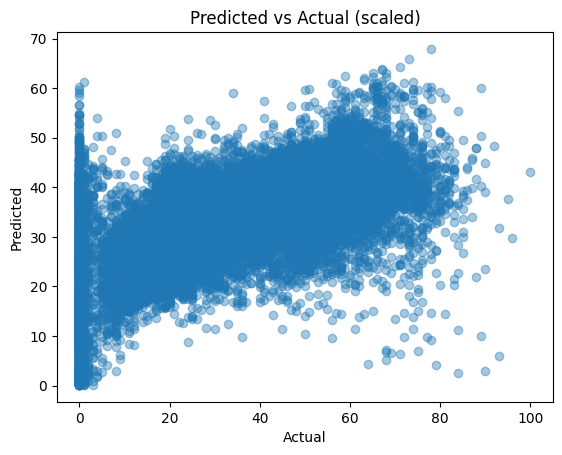

In [51]:
# How did we do?
y_pred_scaled = rf_scaled.predict(X_test_scaled)

plt.scatter(y_test, y_pred_scaled, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (scaled)")
plt.show()

#### a.3 Visualization - Regression tree

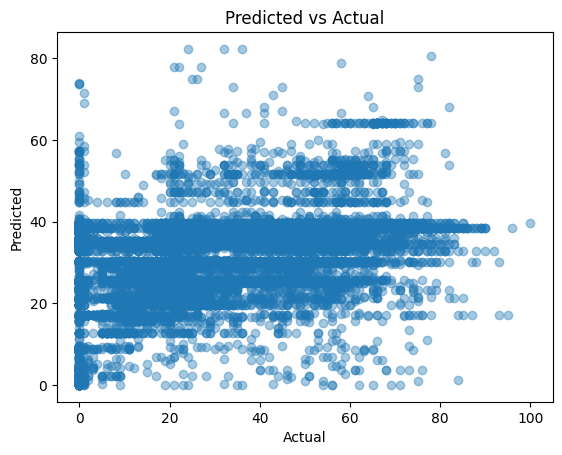

In [52]:
# How did we do?
y_pred = regressor.predict(X_test_scaled)

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

## b. Second Traning (No 0 Popularity)
First we are checking for the amount of songs with 0 popularity. We can see in the graph shown below that there is quite a lot. We choose to delete them and retrain our models.

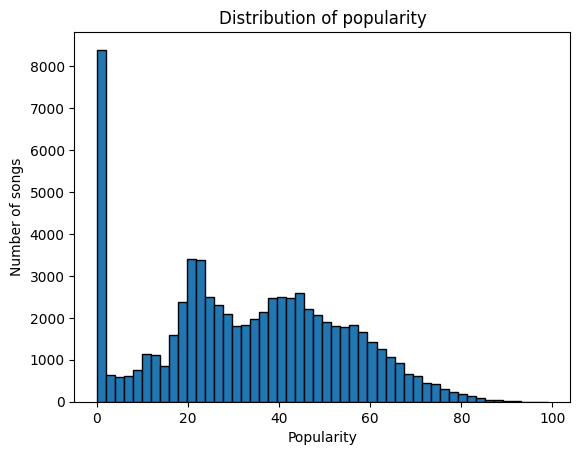

In [53]:
# Check for popularity 
count_zeros = (X_train == 0).sum()
total = len(y_train)
percent_zeros = count_zeros / total * 100

# print(f"Number of Songs with Popularity = 0: {count_zeros}")
# print(f"procent with Popularity = 0: {percent_zeros:.1f}%")

# Visualize
import matplotlib.pyplot as plt
plt.hist(y_train, bins=50, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of songs')
plt.title('Distribution of popularity')
plt.show()

#### b.0 No 0 Popularity

In [81]:
# We are merging the train and test data again 
zero_train = pd.concat([X_train, y_train["popularity"]], axis=1)
zero_test = pd.concat([X_test, y_test["popularity"]], axis=1)

# # Test if merging was complete
# zero_train.head()
# zero_test.head()

# Dropping 0 popularity of zero_train and zero_test
drop_index = zero_train[zero_train['popularity'] == 0].index
zero_train = zero_train.drop(drop_index)

drop_index = zero_test[zero_test['popularity'] == 0].index
zero_test = zero_test.drop(drop_index)

# Checking that 0s are removed
zero_train[zero_train['popularity']==0]

# Re-dropping popularity feature:
zero_y_train = zero_train[['popularity']] # Double [] to make it a dataframe
zero_X_train = zero_train.drop(columns=['popularity'])

zero_y_test = zero_test[['popularity']] # Double [] to make it a dataframe
zero_X_test = zero_test.drop(columns=['popularity'])

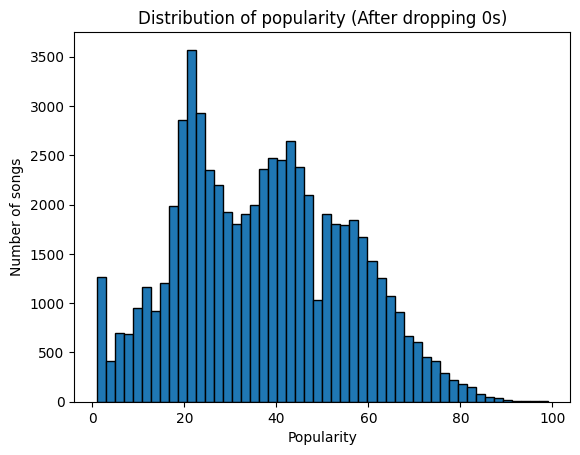

In [82]:
# Check for popularity again
count_zeros = (zero_X_train == 0).sum()
total = len(zero_y_train)
percent_zeros = count_zeros / total * 100

# print(f"Number of Songs with Popularity = 0: {count_zeros}")
# print(f"procent with Popularity = 0: {percent_zeros:.1f}%")

# Visualize
import matplotlib.pyplot as plt
plt.hist(zero_y_train, bins=50, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of songs')
plt.title('Distribution of popularity (After dropping 0s)')
plt.show()

#### b.1 Random Forest (No 0s)

In [83]:
# Random Forest Regressor 
rf = RandomForestRegressor(
    n_estimators=200,        # number of trees
    max_depth=40,           
    min_samples_split=6,     # min samples to split
    min_samples_leaf=2,      # min samples per leaf
    max_features='sqrt',     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf.fit(zero_X_train, zero_y_train)

# pred
zero_y_pred = rf.predict(zero_X_test)

# performance
mse = mean_squared_error(zero_y_test, zero_y_pred)
r2 = r2_score(zero_y_test, zero_y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.3f}")

# feature importance
importances = pd.Series(rf.feature_importances_, index=zero_X_train.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(importances.head(10))

c:\Users\komit\Documents\Education\University\University of Mannheim\1st Sem\Data Mining (IE500)\3. Group Project\datamining_group12\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 218.58
Random Forest R²: 0.329

Top 10 Important Features:
acousticness        0.078458
duration_ms         0.075616
instrumentalness    0.075485
energy              0.071089
loudness            0.070132
speechiness         0.066295
danceability        0.066208
valence             0.064262
tempo               0.055456
liveness            0.052675
dtype: float64


#### b.2 Random Trees (No 0s)

In [79]:
# Initialize Regressor
regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

# Fitting the Regressor
regressor.fit(zero_X_train, zero_y_train)

# Predict the Popularity
zero_y_pred = regressor.predict(zero_X_test)

# What do the metrics say about our model?
print(f"Mean Squared Error: ", mean_squared_error(zero_y_test, zero_y_pred))
print(f"R²: ", r2_score(zero_y_test, zero_y_pred))

Mean Squared Error:  265.76530712877127
R²:  0.18353158483076748
